In [33]:
#%reset #iniciar con la consola limpia
%matplotlib inline
#pip install missingpy
%config InlineBackend.figure_format = 'retina'

#importamos las librerías

from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import dateutil
import seaborn as sns
import io
import sys
import pandas_datareader as dr
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import datetime as dt
from datetime import date
#from datetime import datetime
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import dateutil
import seaborn as sns
import io
import sys
import pandas_datareader as dr
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from dateutil.easter import *
from dateutil.rrule import *
from dateutil.parser import *
from datetime import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import datetime as dt
from datetime import date
#prueba normalidad
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy.stats as stats
import warnings
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import researchpy as rp


## 1- Database Customers

In [2]:
Customers = pd.read_csv('Customers.csv', sep = ',',encoding="utf-8")
Customers=pd.DataFrame(Customers)
Customers.head(30)


,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Country
0,3144837,WEB,0,2021-03-15 17:13:19,en,0,0,NaN,Kenya
1,3174590,WEB,0,2021-03-20 14:15:11,en,0,0,NaN,Kenya
2,3181998,WEB,0,2021-03-21 15:36:51,en,0,0,NaN,Kenya
3,3191244,WEB,0,2021-03-23 08:54:00,en,0,367,NaN,Kenya
4,3274222,WEB,0,2021-04-06 13:52:39,en,0,0,NaN,Kenya
...,...,...,...,...,...,...,...,...,...
25,3357390,WEB,0,2021-04-20 08:37:06,en,0,5,NaN,Kenya
26,3358243,WEB,0,2021-04-20 12:01:42,en,0,2,NaN,Kenya
27,3358561,WEB,0,2021-04-20 12:58:07,en,0,21,NaN,Kenya
28,3364801,WEB,0,2021-04-21 06:15:04,en,0,1,NaN,Kenya


In [3]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          5272 non-null   int64  
 1   Last Used Platform   5272 non-null   object 
 2   Is Blocked           5272 non-null   int64  
 3   Created At           5272 non-null   object 
 4   Language             5272 non-null   object 
 5   Outstanding Amount   5272 non-null   int64  
 6   Loyalty Points       5272 non-null   int64  
 7   Number of Employees  3673 non-null   float64
 8   Country              5272 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 370.8+ KB


#### Cambiamos Number of employees a entero. Como tiene NAN, se hace de la siguiente forma

In [4]:
Customers['Number of Employees']=Customers['Number of Employees'].astype('Int64')
Customers= Customers.replace(["-"],[np.NAN])

In [5]:
Customers.to_csv('Customers1.csv', encoding="utf-8")

## 2- Database Deliveries

In [6]:
#kenia_de = pd.read_csv('Kenya Deliveries.csv', sep = ',',encoding='latin-1')
Deliveries = pd.read_csv('Deliveries.csv', sep = ',',encoding='latin-1')
Deliveries=pd.DataFrame(Deliveries)
Deliveries.head(3)
#kenia_de.info()

C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,...,Task_Details_AMOUNT,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Country
0,357410575,"YR-10691280,0",3.574106e+29,Default Team,Delivery,1280904,Malombe Kimathi,NaN,0.0,Topup Mama,...,NaN,NaN,NaN,NaN,-,-,-,-,NaN,Kenya
1,357410575,"YR-10691280,0",3.574106e+29,Default Team,Delivery,1280904,Malombe Kimathi,NaN,0.0,Topup Mama,...,NaN,0.0,0.0,0.0,5900,CASH,-,-,NaN,Kenya
2,303698961,"YR-8221753,0",3.036990e+29,Default Team,Delivery,1115711,Kennedy Chege,NaN,0.0,Kibanda Topup,...,NaN,0.0,0.0,0.0,6080,CASH,-,-,NaN,Kenya


In [7]:
#Deliveries.info()

In [8]:
Deliveries['Task_Details_AMOUNT'].value_counts().sort_index()

2.0            1
20.0           1
25.0         321
30.0          24
35.0         256
            ... 
1047500.0      2
1239000.0      1
1251000.0      1
1257000.0      1
1421000.0      1
Name: Task_Details_AMOUNT, Length: 2540, dtype: int64

In [9]:
Deliveries = Deliveries.replace(["-"],[np.NAN])
Deliveries['Order_ID'] = Deliveries['Order_ID'].str.replace("YR-",'')
Deliveries['Order_ID'] = Deliveries['Order_ID'].str.replace(",0",'')
Deliveries.head()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,...,Task_Details_AMOUNT,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Country
0,357410575,10691280,3.574106e+29,Default Team,Delivery,1280904,Malombe Kimathi,NaN,0.0,Topup Mama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kenya
1,357410575,10691280,3.574106e+29,Default Team,Delivery,1280904,Malombe Kimathi,NaN,0.0,Topup Mama,...,NaN,0.0,0.0,0.0,5900,CASH,NaN,NaN,NaN,Kenya
2,303698961,8221753,3.036990e+29,Default Team,Delivery,1115711,Kennedy Chege,NaN,0.0,Kibanda Topup,...,NaN,0.0,0.0,0.0,6080,CASH,NaN,NaN,NaN,Kenya
3,302906575,8133470,3.029066e+29,Default Team,Delivery,NaN,NaN,NaN,0.0,Kibanda Topup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kenya
4,302906575,8133470,3.029066e+29,Default Team,Delivery,NaN,NaN,NaN,0.0,Kibanda Topup,...,NaN,0.0,0.0,0.0,5730,CASH,NaN,NaN,NaN,Kenya


In [10]:
Deliveries['Order_ID']=Deliveries['Order_ID'].astype(str)

In [11]:
Deliveries['Order_ID']=Deliveries['Order_ID'].astype(float)
#Deliveries.info()

In [12]:
Deliveries.to_csv('Deliveries1.csv', encoding="utf-8")

## 3. Database orders

In [13]:
Orders = pd.read_csv('Orders.csv', sep = ',',encoding="utf-8")
Ordersr=pd.DataFrame(Orders)
Orders.head(5)

,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,...,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Country
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,NaN,NaN,1,4400,4250.0,4250.0,...,NaN,0,-,50,-,NaN,0,-,-,Kenya
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,NaN,NaN,1,180,130.0,130.0,...,NaN,0,-,-,-,NaN,0,-,-,Kenya
2,11264651,ORDERED,Flour & Sugar,KKFS0702,NaN,NaN,6,263,247.0,1482.0,...,NaN,0,-,-,-,NaN,0,-,-,Kenya
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,NaN,NaN,10,65,58.0,580.0,...,NaN,0,-,-,-,NaN,0,-,-,Kenya
4,11264651,ORDERED,Beverages,KKBE0105,NaN,NaN,1,249,208.5,208.5,...,NaN,0,-,-,-,NaN,0,-,-,Kenya


In [14]:
#Orders.info()

#### We remove the null variables

In [15]:
Orders=Orders.drop(columns = ['Cancellation Reason']) 
Orders=Orders.drop(columns = ['Customization Group']) 
Orders=Orders.drop(columns = ['Customization Option']) 
Orders=Orders.drop(columns = ['Merchant Earning']) 
Orders=Orders.drop(columns = ['Commission Amount']) 
Orders=Orders.drop(columns = ['Commission Payout Status']) 
Orders=Orders.drop(columns = ['Promo Code']) 
Orders=Orders.drop(columns = ['Transaction Status']) 
#Orders.info()

###  We explore the values of some variables

In [16]:
#orders['Payment Method'].value_counts().sort_index()
Orders['Reviews'].value_counts().sort_index()
Orders['Ratings'].value_counts().sort_index()
Orders['Checkout Template Value'].value_counts().sort_index()
Orders['Checkout Template Name'].value_counts().sort_index()
Orders['Flat Discount'].value_counts().sort_index()
Orders['Taxable Amount'].value_counts().sort_index()
Orders['Additional Charge'].value_counts().sort_index()
Orders['Remaining Balance'].value_counts().sort_index()
Orders['Tip'].value_counts().sort_index()
Orders['Delivery Charge'].value_counts().sort_index()
Orders['Tax'].value_counts().sort_index()

-    13671
Name: Tax, dtype: int64

In [17]:
Orders=Orders.drop(columns = ['Checkout Template Value']) 
Orders=Orders.drop(columns = ['Checkout Template Name']) 
Orders=Orders.drop(columns = ['Flat Discount']) 
Orders=Orders.drop(columns = ['Taxable Amount']) 
Orders=Orders.drop(columns = ['Additional Charge']) 
Orders=Orders.drop(columns = ['Remaining Balance']) 
Orders=Orders.drop(columns = ['Tip']) 
Orders=Orders.drop(columns = ['Delivery Charge']) 
Orders=Orders.drop(columns = ['Tax']) 
Orders=Orders.drop(columns = ['Debt Amount']) 
Orders=Orders.drop(columns = ['Discount']) 
Orders=Orders.drop(columns = ['Ratings']) 
Orders=Orders.drop(columns = ['Reviews']) 
Orders= Orders.replace(["-"],[np.NAN])

In [18]:
#Orders.info()

## Guardamos el fichero Orders con la info modificada

In [19]:
Orders.to_csv('Orders1.csv', encoding="utf-8")
# Verificamos que se haya guardado bien
Orders=pd.read_csv('Orders1.csv', encoding="utf-8") #ficheros con NA sin imputar
Orders.head(4)
Orders=Orders.drop(columns = ['Unnamed: 0']) 
#Orders.dtypes


# 4. Merging data in one DATABASE

## 4-1 Merging databases: Customers & Orders considering the Customer ID

In [20]:
Customers_Orders=Orders.merge(Customers,'left', on=['Customer ID','Country'])
#merged_left = Orders.join(Customers,  on ='Customer ID',how='left')
Customers_Orders



,Order ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,...,Redeemed Loyalty Points,Consumed Loyalty Points,Country,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250.0,4250.0,4400,4350.0,...,50.0,NaN,Kenya,WEB,0,2021-06-11 15:42:57,en,0,43,3
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130.0,130.0,180,7255.0,...,NaN,NaN,Kenya,WEB,0,2021-11-09 15:40:46,en,0,145,<NA>
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247.0,1482.0,1578,7255.0,...,NaN,NaN,Kenya,WEB,0,2021-11-09 15:40:46,en,0,145,<NA>
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58.0,580.0,650,7255.0,...,NaN,NaN,Kenya,WEB,0,2021-11-09 15:40:46,en,0,145,<NA>
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,...,NaN,NaN,Kenya,WEB,0,2021-11-09 15:40:46,en,0,145,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,10422797,COMPLETED,Beverages,KNBE0002,2,6600,6000.0,12000.0,13200,71900.0,...,NaN,143.0,Nigeria,WEB,0,2021-11-21 15:41:40,en,0,1139,8
13667,10422797,COMPLETED,Beverages,KNBE0001,2,6600,6000.0,12000.0,13200,71900.0,...,NaN,143.0,Nigeria,WEB,0,2021-11-21 15:41:40,en,0,1139,8
13668,10422634,COMPLETED,Flour & Sugar,KNFS0001,10,21050,20420.0,204200.0,210500,210500.0,...,NaN,421.0,Nigeria,WEB,0,2021-10-28 10:12:40,en,0,23307,4
13669,10422279,COMPLETED,Flour & Sugar,KNFS0001,5,21050,20420.0,102100.0,105250,105250.0,...,NaN,210.0,Nigeria,WEB,0,2021-11-14 23:32:40,en,0,3130,<NA>


In [21]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53002 entries, 0 to 53001
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                53002 non-null  int64  
 1   Order_ID               53001 non-null  float64
 2   Relationship           53002 non-null  float64
 3   Team_Name              53002 non-null  object 
 4   Task_Type              53002 non-null  object 
 5   Agent_ID               49543 non-null  object 
 6   Agent_Name             42245 non-null  object 
 7   Distance(m)            43306 non-null  object 
 8   Total_Time_Taken(min)  52774 non-null  float64
 9   Pick_up_From           53002 non-null  object 
 10  Start_Before           53002 non-null  object 
 11  Complete_Before        53001 non-null  object 
 12  Completion_Time        52774 non-null  object 
 13  Task_Status            53002 non-null  object 
 14  Ref_Images             0 non-null      float64
 15  Ra

In [22]:
Customers_Orders=Customers_Orders.rename(columns = {'Order ID':'Order_ID','Total Price':'Total_Price'}, inplace = False)
Deliveries=Deliveries.rename(columns = {'Task_Details_AMOUNT':'Total_Price','Task_Details_QTY':'Quantity'}, inplace = False)


## 4-2 Merging all data: Deliveries & Customers_Orders databases

In [23]:
#merged_left=Orders.merge(Customers, on='Customer ID', how='left')
#Database_complete=Deliveries.merge(merged_left, on='Order_ID', how='left')
Customers_Orders=Customers_Orders.rename(columns = {'Order ID':'Order_ID','Total Price':'Total_Price'}, inplace = False)
Database_complete=Customers_Orders.merge(Deliveries, "left", on=['Order_ID','Total_Price', 'Quantity','Country'])
Database_complete

C:\Users\usuario\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1123: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Order_ID,Order Status,Category Name,SKU,Quantity,Unit Price,Cost Price,Total Cost Price,Total_Price,Order Total,...,Promo_Applied,Custom_Template_ID,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,11265015,ORDERED,Cooking Fat & Oil,KKCO0487,1,4400,4250.0,4250.0,4400,4350.0,...,NaN,Order_Details,0.0,0.0,50.0,4350,CASH,NaN,NaN,NaN
1,11264651,ORDERED,Cleaning & Hygiene,KKPT280100,1,180,130.0,130.0,180,7255.0,...,NaN,Order_Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11264651,ORDERED,Flour & Sugar,KKFS0702,6,263,247.0,1482.0,1578,7255.0,...,NaN,Order_Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11264651,ORDERED,Salt & Seasoning,KKSS0002,10,65,58.0,580.0,650,7255.0,...,NaN,Order_Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11264651,ORDERED,Beverages,KKBE0105,1,249,208.5,208.5,249,7255.0,...,NaN,Order_Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13946,10422797,COMPLETED,Beverages,KNBE0001,2,6600,6000.0,12000.0,13200,71900.0,...,NaN,Order_Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13947,10422797,COMPLETED,Beverages,KNBE0001,2,6600,6000.0,12000.0,13200,71900.0,...,NaN,Order_Details,0.0,0.0,0.0,71900,CASH,NaN,NaN,NaN
13948,10422634,COMPLETED,Flour & Sugar,KNFS0001,10,21050,20420.0,204200.0,210500,210500.0,...,NaN,Order_Details,0.0,0.0,0.0,210500,CASH,NaN,NaN,NaN
13949,10422279,COMPLETED,Flour & Sugar,KNFS0001,5,21050,20420.0,102100.0,105250,105250.0,...,NaN,Order_Details,0.0,0.0,0.0,105250,CASH,NaN,NaN,NaN


In [24]:
#Database_complete.info()

### Dropping empty variables

In [25]:
Database_complete=Database_complete.drop(columns = ['Ref_Images','Tags','Promo_Applied','Task_Category','Review']) 

In [26]:
#Database_complete.info()

### According to the analysis, the following variables show the same output for every row. Then, I removed them because they do not provide information (Variability)

In [27]:
Database_complete['Task_Type'].value_counts().sort_index()
Database_complete['Team_Name'].value_counts().sort_index()
Database_complete['Pick_up_From'].value_counts().sort_index()
Database_complete['Language'].value_counts().sort_index()
Database_complete['Last Used Platform'].value_counts().sort_index()
Database_complete['Store Name'].value_counts().sort_index()
Database_complete['Currency Symbol'].value_counts().sort_index()
Database_complete['Last Used Platform'].value_counts().sort_index()
Database_complete['Is Blocked'].value_counts().sort_index()
Database_complete['Outstanding Amount'].value_counts().sort_index()
Database_complete['Order Preparation Time'].value_counts().sort_index() 

0    13951
Name: Order Preparation Time, dtype: int64

In [28]:
Database_complete=Database_complete.drop(columns = ['Task_Type','Team_Name','Pick_up_From','Language','Last Used Platform','Store Name','Payment_Type',
                                                    'Currency Symbol','Last Used Platform','Is Blocked','Outstanding Amount','Order Preparation Time'])

In [29]:
Database_complete.to_csv('Database_complete.csv', encoding="utf-8")

In [30]:
Database_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13951 entries, 0 to 13950
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order_ID                 13951 non-null  int64  
 1   Order Status             13951 non-null  object 
 2   Category Name            13945 non-null  object 
 3   SKU                      13948 non-null  object 
 4   Quantity                 13951 non-null  object 
 5   Unit Price               13951 non-null  int64  
 6   Cost Price               13945 non-null  float64
 7   Total Cost Price         13945 non-null  float64
 8   Total_Price              13951 non-null  int64  
 9   Order Total              13951 non-null  float64
 10  Sub Total                13951 non-null  int64  
 11  Payment Method           13951 non-null  object 
 12  Transaction ID           13951 non-null  int64  
 13  Customer ID              13951 non-null  int64  
 14  Merchant ID           

## 5- EDA (Exploratory Data Analysis) for all data

### 5.1 Analysis of Products Categories (Category Name) 

In [31]:
Database_complete["Category Name"].value_counts().sort_index()

Beer & Bitters            3
Beverages               324
Cleaning & Hygiene      980
Cooking Fat & Oil      3104
Flour & Sugar          4559
Fruits & Vegetables    1051
Meat & Fish             461
Noodles & Spaghetti      63
Packaging               755
Rice & Cereals          494
Salt & Seasoning       2018
Spreads                  70
Vegetables               62
Wine                      1
Name: Category Name, dtype: int64

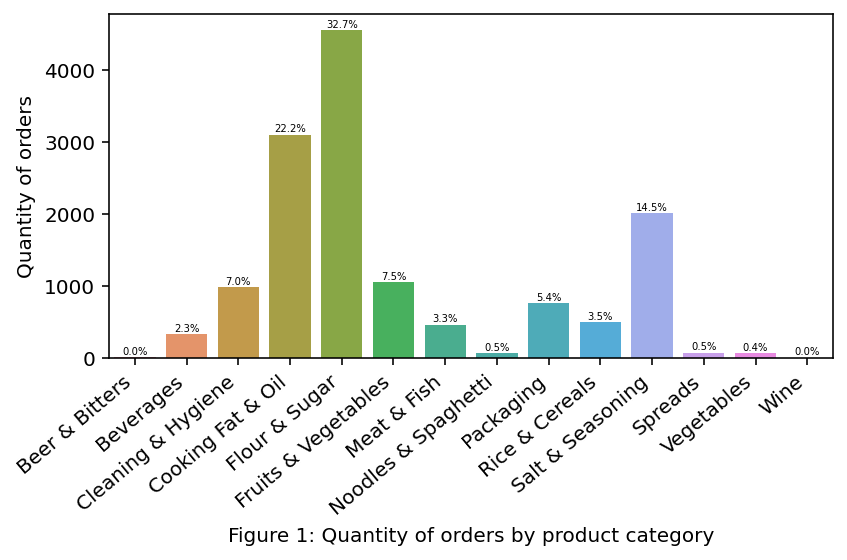

In [34]:
ax=sn.countplot('Category Name',
                order=['Beer & Bitters','Beverages',
                                      'Cleaning & Hygiene','Cooking Fat & Oil',
                                      'Flour & Sugar', 'Fruits & Vegetables',
                                      'Meat & Fish', 'Noodles & Spaghetti',
                                      'Packaging', 'Rice & Cereals',
                                      'Salt & Seasoning', 'Spreads',
                                      'Vegetables', 'Wine'],
                data=Database_complete)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(Database_complete)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', size=5)
    
    
plt.xlabel('Figure 1: Quantity of orders by product category')
plt.ylabel('Quantity of orders')
#plt.title('Tramo de Edad de las personas involucradas en accidentes de tráfico')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

#df_accidentes.Tramo_edad.value_counts()

### 5.2 Analysis of all data by Category product and Country

#### We can observed the relationship between the Country and the Category of product in order to analyze which product# could be more demanded in each place.

In [35]:
rp.summary_cat(Database_complete[["Category Name", "Country"]])
#------------------------------------------------------------
crosstab = pd.crosstab(Database_complete["Category Name"], Database_complete["Country"])

crosstab
#---------------------------------
stats.chi2_contingency(crosstab)
#------------------------------------------------------------
crosstab, test_results, expected = rp.crosstab(Database_complete["Category Name"], Database_complete["Country"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
#--------------------------------------------------------
test_results

,Chi-square test,results
0,Pearson Chi-square ( 13.0) =,2349.3647
1,p-value =,0.0000
2,Cramer's V =,0.4105


Text(0, 0.5, 'Relative frequency')

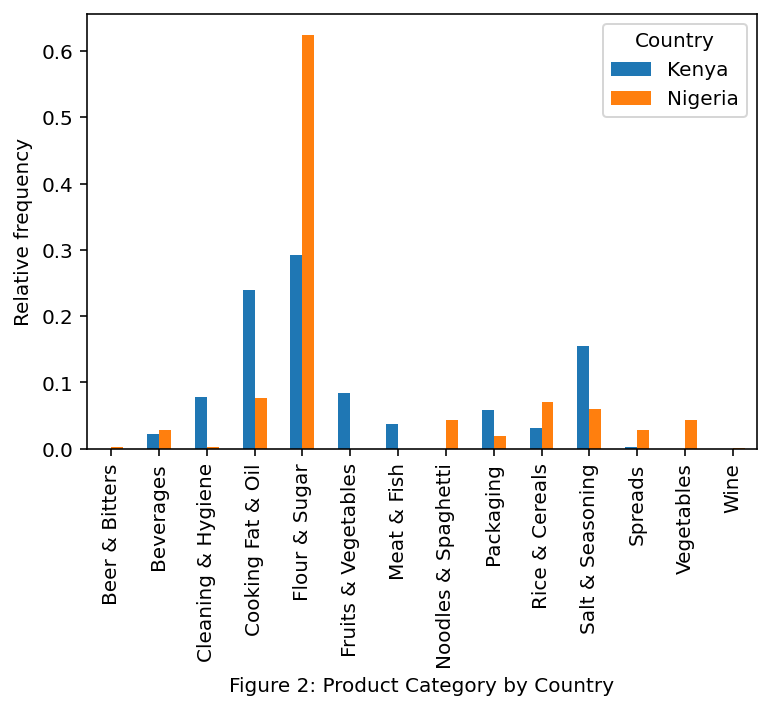

In [36]:
ax = pd.crosstab(index=Database_complete['Category Name'], 
            columns=Database_complete['Country'], normalize='columns', rownames=['Figure 2: Product Category by Country'],colnames= ['Country']       
                  ).plot(kind='bar', stacked=False)
    
plt.ylabel('Relative frequency')

In [ ]:
rp.summary_cat(Database_complete[["Category Name", "Country"]])
#------------------------------------------------------------
crosstab = pd.crosstab(Database_complete["Category Name"], Database_complete["Country"])

crosstab
#---------------------------------
stats.chi2_contingency(crosstab)
#------------------------------------------------------------
crosstab, test_results, expected = rp.crosstab(Database_complete["Category Name"], Database_complete["Country"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
#--------------------------------------------------------
test_results

## 6- GROUPING DATA BY Customer ID

In [81]:
#Database_byOrderID = Database_complete.groupby(['Order_ID','Order Status','Task_Status','Payment Method', 'Total_Time_Taken(min)', 'Order Total','Country'])[['Order_ID']].size().agg({'Total_Price': ['sum','mean'],'Quantity': ['sum']})
Database_byCustomers = Database_complete.groupby(['Customer ID','Total_Time_Taken(min)', 'Distance (in km)','Loyalty Points', 'Number of Employees', 'Payment Method','Order Status','Latitude', 'Longitude','Country']).agg(Cust_Expen=('Total_Price','sum'), Mean_Cust_Exp=('Total_Price','mean'), Purch_quantity=('Quantity','sum'))

Database_byCustomers=Database_byCustomers.rename(columns = {'Total_Time_Taken(min)':'Time'}, inplace = False)
Database_byCustomers.head()

Cust_Expen  \
Customer ID Total_Time_Taken(min) Distance (in km) Loyalty Points Number of Employees Payment Method Order Status Latitude  Longitude Country               
3457559     14.33                 20.29            28             4                   CASH           COMPLETED    -1.165012 36.958350 Kenya          2235   
3553157     17.75                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya          2040   
            61.78                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya          2979   
3554524     1990.72               8.82             58             3                   CASH           COMPLETED    -1.260588 36.874278 Kenya          4371   
3555286     257.32                13.67            67             1                   CASH           COMPLETED    -1.186376 36.902238 Kenya          4296   

                                                                                                                                               Mean_Cust_Exp  \
Customer ID Total_Time_Taken(min) Distance (in km) Loyalty Points Number of Employees Payment Method Order Status Latitude  Longitude Country                  
3457559     14.33                 20.29            28             4                   CASH           COMPLETED    -1.165012 36.958350 Kenya         1117.500   
3553157     17.75                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya          340.000   
            61.78                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya          372.375   
3554524     1990.72               8.82             58             3                   CASH           COMPLETED    -1.260588 36.874278 Kenya         1457.000   
3555286     257.32                13.67            67             1                   CASH           COMPLETED    -1.186376 36.902238 Kenya         4296.000   

                                                                                                                                               Purch_quantity  
Customer ID Total_Time_Taken(min) Distance (in km) Loyalty Points Number of Employees Payment Method Order Status Latitude  Longitude Country                  
3457559     14.33                 20.29            28             4                   CASH           COMPLETED    -1.165012 36.958350 Kenya                 2  
3553157     17.75                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya                18  
            61.78                 5.22             158            2                   CASH           COMPLETED    -1.293994 36.785823 Kenya                10  
3554524     1990.72               8.82             58             3                   CASH           COMPLETED    -1.260588 36.874278 Kenya                 3  
3555286     257.32                13.67            67             1                   CASH           COMPLETED    -1.186376 36.902238 Kenya                 1

In [82]:
Database_byCustomers.to_csv('Database_byCustomers.csv', encoding="utf-8")

In [83]:
Database_byCustomers.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2811 entries, (3457559, 14.33, 20.29, 28, 4, 'CASH', 'COMPLETED', -1.1650120000000002, 36.9583499, 'Kenya') to (5185675, 6.85, 17.47, 20, 1, 'CASH', 'COMPLETED', -1.3584108, 36.907888299999996, 'Kenya')
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_Expen      2811 non-null   int64  
 1   Mean_Cust_Exp   2811 non-null   float64
 2   Purch_quantity  2811 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 152.1+ KB


### Number of customers by Country

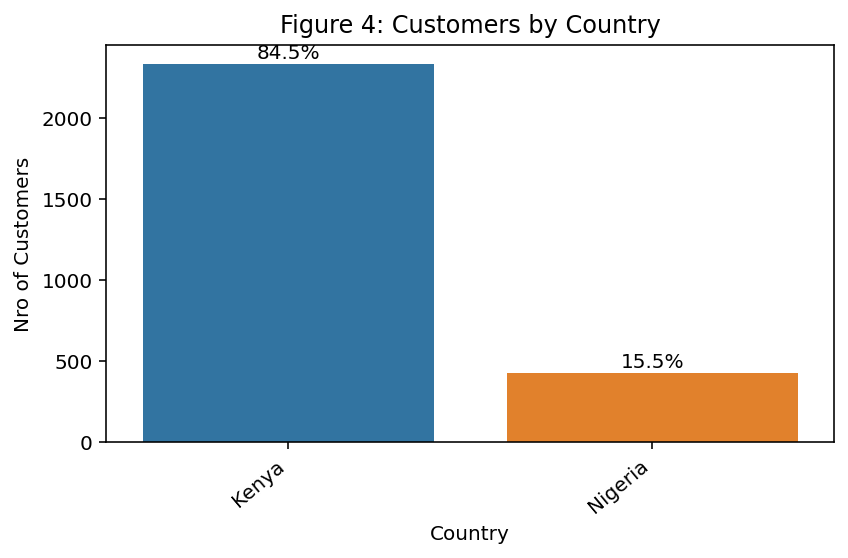

In [78]:
Database_byCustomers = Database_complete.groupby(['Customer ID','Total_Time_Taken(min)', 'Distance (in km)','Loyalty Points', 'Number of Employees', 'Latitude', 'Longitude','Country'], as_index=False)[['Customer ID']].size()
ax = sn.countplot('Country',data=Database_byCustomers)
ax.set(xlabel='Country', ylabel='Number of Customers')
plt.xlabel('Country')
plt.ylabel('Nro of Customers')
plt.title('Figure 4: Customers by Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(Database_byCustomers)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()


## 7- GROUPING DATA BY Order ID

In [73]:
Database_byOrderID = Database_complete.groupby(['Order_ID','Order Status','Task_Status','Payment Method', 'Rating','Total_Time_Taken(min)', 'Order Total','Distance (in km)','Loyalty Points', 'Number of Employees', 'Latitude', 'Longitude','Country'], as_index=False)[['Order_ID']].size()
Database_byOrderID=Database_byOrderID.rename(columns = {'size':'Num_entries', 'Total_Time_Taken(min)': 'Time','Distance (in km)':'Distance_km', 'Latitude':'Lat', 'Longitude':'Long','Number of Employees':'Nro_Employees'}, inplace = False)
#Database_byOrderID = Database_complete.groupby(['Order_ID','Order Status','Task_Status','Payment Method', 'Total_Time_Taken(min)', 'Order Total','Country']).size().agg({'Total_Price': ['sum','mean'],'Quantity': ['sum']})
Database_byOrderID


,Order_ID,Order Status,Task_Status,Payment Method,Rating,Time,Order Total,Distance_km,Loyalty Points,Nro_Employees,Lat,Long,Country,Num_entries
0,10387273,CANCELLED,Cancelled,CASH,0.0,0.00,7180.0,5.89,1037,8,-1.225803,36.843939,Kenya,3
1,10406885,CANCELLED,Cancelled,CASH,0.0,0.00,21461.0,7.11,1031,3,-1.300000,36.833330,Kenya,7
2,10407578,COMPLETED,Completed,CASH,0.0,26.55,21910.0,7.11,1031,3,-1.300000,36.833330,Kenya,7
3,10408346,COMPLETED,Completed,CASH,0.0,9.83,8104.0,6.70,512,16,-1.288513,36.751124,Kenya,5
4,10409998,COMPLETED,Completed,CASH,0.0,116.52,2686.0,21.28,0,2,-1.294165,36.981689,Kenya,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,11260497,CANCELLED,Failed,CASH,0.0,0.00,131600.0,11995.09,348,4,6.542840,3.384972,Nigeria,2
2939,11260514,COMPLETED,Completed,CASH,0.0,62.92,124825.0,11995.09,348,4,6.542840,3.384972,Nigeria,2
2940,11260548,COMPLETED,Completed,CASH,0.0,91.90,48200.0,11994.94,909,10,6.536348,3.373325,Nigeria,2
2941,11260622,COMPLETED,Completed,CASH,0.0,169.53,21925.0,11987.25,1508,3,6.631510,3.388435,Nigeria,2


In [70]:
Database_byOrderID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        2943 non-null   int64  
 1   Order Status    2943 non-null   object 
 2   Task_Status     2943 non-null   object 
 3   Payment Method  2943 non-null   object 
 4   Time            2943 non-null   float64
 5   Order Total     2943 non-null   float64
 6   Distance_km     2943 non-null   float64
 7   Loyalty Points  2943 non-null   int64  
 8   Nro_Employees   2943 non-null   int64  
 9   Lat             2943 non-null   float64
 10  Long            2943 non-null   float64
 11  Country         2943 non-null   object 
 12  Num_entries     2943 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 299.0+ KB


In [74]:
Database_byOrderID.to_csv('Database_byOrderID.csv', encoding="utf-8")

## 8- Orders and Revenue GROUPED by Store

In [85]:
Database_byStore = Database_byOrderID.groupby(['Lat','Long', 'Nro_Employees','Payment Method','Order Status','Rating','Country']).agg(N_Orders=('Order Total', 'count'),Revenue_byStore=('Order Total', 'sum'), Mean_Rev_byStore=('Order Total', 'mean'))
Database_byStore.head(10)

N_Orders  \
Lat       Long      Nro_Employees Payment Method Order Status Rating Country             
-8.901959 13.197016 1             CASH           CANCELLED    0.0    Kenya           1   
-1.475960 36.959040 2             CASH           COMPLETED    0.0    Kenya           2   
-1.396854 36.758234 3             CASH           CANCELLED    0.0    Kenya           1   
-1.396817 36.749753 4             CASH           COMPLETED    0.0    Kenya           1   
-1.396806 36.749739 4             CASH           CANCELLED    0.0    Kenya           1   
                                                 COMPLETED    0.0    Kenya           1   
-1.396545 36.765326 2             CASH           COMPLETED    0.0    Kenya          11   
-1.396390 36.940280 1             CASH           COMPLETED    0.0    Kenya           2   
-1.396276 36.762251 3             CASH           COMPLETED    0.0    Kenya           2   
-1.395300 36.764000 3             CASH           COMPLETED    0.0    Kenya           3   

                                                                              Revenue_byStore  \
Lat       Long      Nro_Employees Payment Method Order Status Rating Country                    
-8.901959 13.197016 1             CASH           CANCELLED    0.0    Kenya             2940.0   
-1.475960 36.959040 2             CASH           COMPLETED    0.0    Kenya            74773.0   
-1.396854 36.758234 3             CASH           CANCELLED    0.0    Kenya             2158.0   
-1.396817 36.749753 4             CASH           COMPLETED    0.0    Kenya             3110.0   
-1.396806 36.749739 4             CASH           CANCELLED    0.0    Kenya             2045.0   
                                                 COMPLETED    0.0    Kenya             2245.0   
-1.396545 36.765326 2             CASH           COMPLETED    0.0    Kenya           257045.0   
-1.396390 36.940280 1             CASH           COMPLETED    0.0    Kenya            14440.0   
-1.396276 36.762251 3             CASH           COMPLETED    0.0    Kenya             4396.0   
-1.395300 36.764000 3             CASH           COMPLETED    0.0    Kenya            13604.0   

                                                                              Mean_Rev_byStore  
Lat       Long      Nro_Employees Payment Method Order Status Rating Country                    
-8.901959 13.197016 1             CASH           CANCELLED    0.0    Kenya         2940.000000  
-1.475960 36.959040 2             CASH           COMPLETED    0.0    Kenya        37386.500000  
-1.396854 36.758234 3             CASH           CANCELLED    0.0    Kenya         2158.000000  
-1.396817 36.749753 4             CASH           COMPLETED    0.0    Kenya         3110.000000  
-1.396806 36.749739 4             CASH           CANCELLED    0.0    Kenya         2045.000000  
                                                 COMPLETED    0.0    Kenya         2245.000000  
-1.396545 36.765326 2             CASH           COMPLETED    0.0    Kenya        23367.727273  
-1.396390 36.940280 1             CASH           COMPLETED    0.0    Kenya         7220.000000  
-1.396276 36.762251 3             CASH           COMPLETED    0.0    Kenya         2198.000000  
-1.395300 36.764000 3             CASH           COMPLETED    0.0    Kenya         4534.666667

In [86]:
Database_byStore.to_csv('Database_byStore.csv', encoding="utf-8")

## 9- EDA (Exploratory Data Analysis) 

## 9.1. EDA GROUPED BY ORDER ID

### 9.1.1 Anaylisis by Country

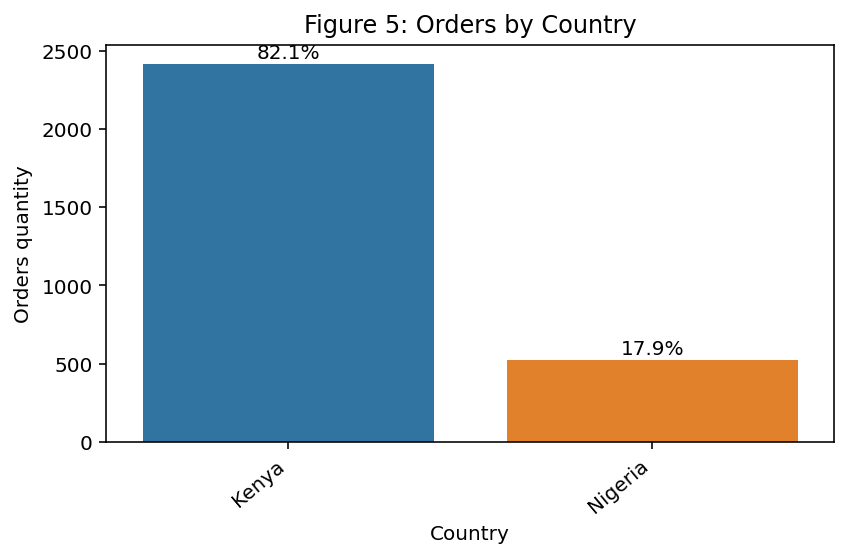

In [137]:
ax = sn.countplot('Country',data=Database_byOrderID)
ax.set(xlabel='Country', ylabel='Orders quantity')
plt.xlabel('Country')
plt.ylabel('Orders quantity')
plt.title('Figure 5: Orders by Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(Database_byOrderID)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

### 9.1.2 Analysis by Task Status

In [100]:
Database_byOrderID['Task_Status'].value_counts().sort_index()

Cancelled     153
Completed    2698
Failed         92
Name: Task_Status, dtype: int64

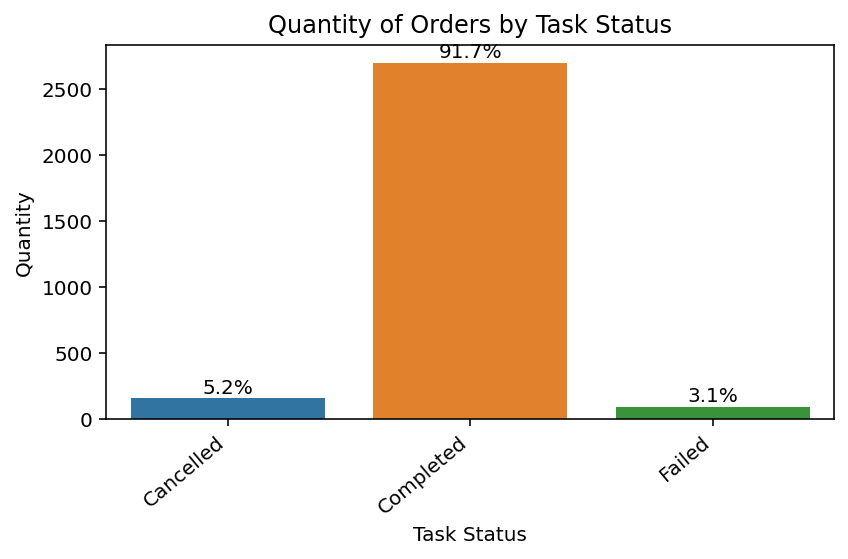

In [105]:
ax = sn.countplot('Task_Status',data=Database_byOrderID)
ax.set(xlabel='Task Status', ylabel='Quantity of orders')
plt.xlabel('Task Status')
plt.ylabel('Quantity')
plt.title('Quantity of Orders by Task Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(Database_byOrderID)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()




In [106]:
Database_byOrderID['Order Status'].value_counts().sort_index()

CANCELLED     246
COMPLETED    2697
Name: Order Status, dtype: int64

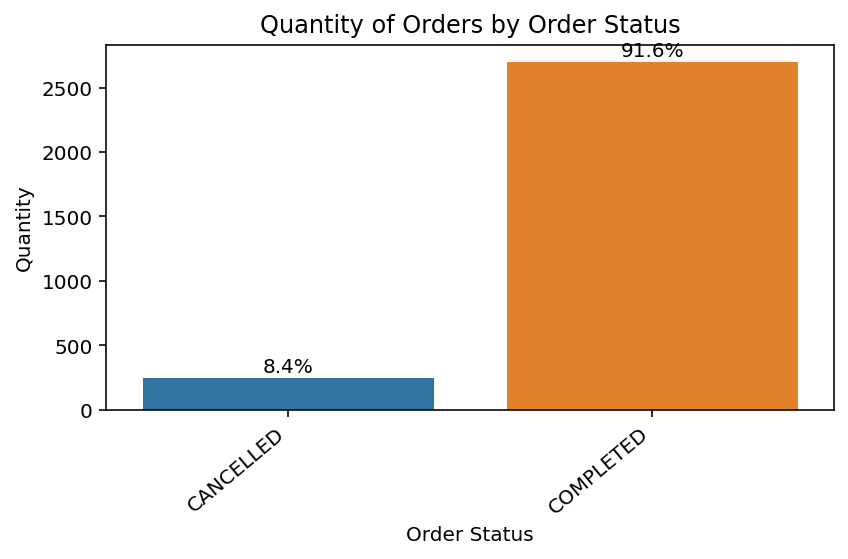

In [107]:
ax = sn.countplot('Order Status',data=Database_byOrderID)
ax.set(xlabel='Order Status', ylabel='Quantity of orders')
plt.xlabel('Order Status')
plt.ylabel('Quantity')
plt.title('Quantity of Orders by Order Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
total = len(Database_byOrderID)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()




## 9.2.Analysis combining to variables

### 9.2.1. Task Status by Country


#### Realtionship between The Task Status and the country

#### We can measure the relationship between the variables by doing the following test 

In [113]:
rp.summary_cat(Database_byOrderID[["Task_Status", "Country"]])
#------------------------------------------------------------
crosstab = pd.crosstab(Database_byOrderID["Task_Status"], Database_byOrderID["Country"])

crosstab
#---------------------------------
stats.chi2_contingency(crosstab)
#------------------------------------------------------------
crosstab, test_results, expected = rp.crosstab(Database_byOrderID["Task_Status"], Database_byOrderID["Country"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
#--------------------------------------------------------
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,262.7955
1,p-value =,0.0000
2,Cramer's V =,0.2988


Text(0, 0.5, 'Relative frequency')

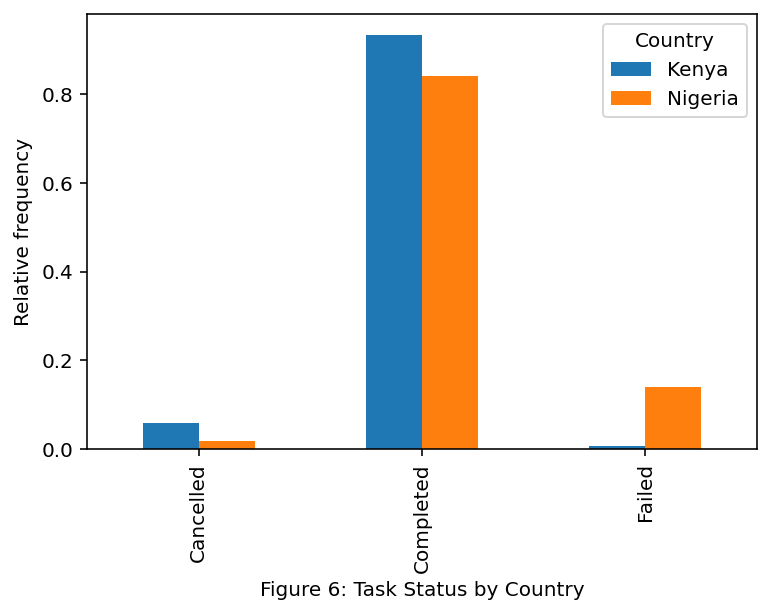

In [138]:
ax = pd.crosstab(index=Database_byOrderID['Task_Status'], 
            columns=Database_byOrderID['Country'], normalize='columns', rownames=['Figure 6: Task Status by Country'],colnames= ['Country']       
                  ).plot(kind='bar', stacked=False)
    
plt.ylabel('Relative frequency')

### 9.2.2.Payment Method by Country

#### Realtionship between The Task Status and the country. We can measure the relationship between the variables by doing the following test

In [114]:
rp.summary_cat(Database_byOrderID[["Payment Method", "Country"]])
#------------------------------------------------------------
crosstab = pd.crosstab(Database_byOrderID["Payment Method"], Database_byOrderID["Country"])

crosstab
#---------------------------------
stats.chi2_contingency(crosstab)
#------------------------------------------------------------
crosstab, test_results, expected = rp.crosstab(Database_byOrderID["Payment Method"], Database_byOrderID["Country"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
#--------------------------------------------------------
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,22.1516
1,p-value =,0.0000
2,Cramer's phi =,0.0868


Text(0, 0.5, 'Relative frequency')

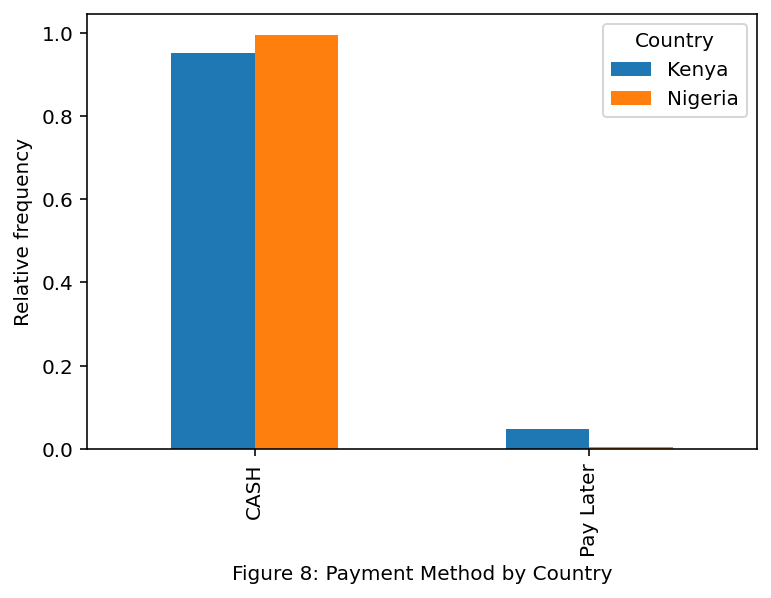

In [139]:
ax = pd.crosstab(index=Database_byOrderID['Payment Method'], 
            columns=Database_byOrderID['Country'], normalize='columns', rownames=['Figure 8: Payment Method by Country'],colnames= ['Country']       
                  ).plot(kind='bar', stacked=False)
    
plt.ylabel('Relative frequency')

### 9.2.3. Order Status by Country

#### Realtionship between The Task Status and the country. We can measure the relationship between the variables by doing the following test

In [118]:
rp.summary_cat(Database_byOrderID[["Order Status", "Country"]])
#------------------------------------------------------------
crosstab = pd.crosstab(Database_byOrderID["Order Status"], Database_byOrderID["Country"])

crosstab
#---------------------------------
stats.chi2_contingency(crosstab)
#------------------------------------------------------------
crosstab, test_results, expected = rp.crosstab(Database_byOrderID["Order Status"], Database_byOrderID["Country"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
#--------------------------------------------------------
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,48.4307
1,p-value =,0.0000
2,Cramer's phi =,0.1283


Text(0, 0.5, 'Relative frequency')

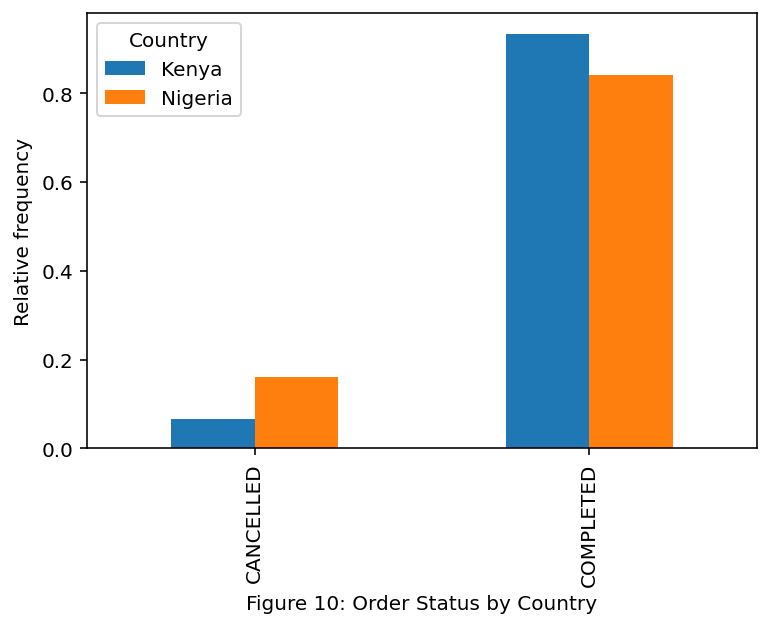

In [140]:
ax = pd.crosstab(index=Database_byOrderID['Order Status'], 
            columns=Database_byOrderID['Country'], normalize='columns', rownames=['Figure 10: Order Status by Country'],colnames= ['Country']       
                  ).plot(kind='bar', stacked=False)
    
plt.ylabel('Relative frequency')